# 4.1 线性回归

线性回归模型预测  
$$ \hat{y}=\theta{_0}+\theta{_1}x{_1}+\theta{_2}x{_2}+...+\theta{_n}x{_n} $$

线性回归模型预测(向量化形式)  
$$ \hat{y}=h{_\theta}(x)=\theta\cdot x $$

[MSE成本函数](https://blog.csdn.net/yiyexy/article/details/114335981#:~:text=1%E3%80%81%E4%BB%80%E4%B9%88%E6%98%AF%E6%88%90%E6%9C%AC%E5%87%BD%E6%95%B0%202%E3%80%81%E6%88%90%E6%9C%AC%E5%87%BD%E6%95%B0%20Mean%20Square%20Error%20%28MSE%29,Mean%20Absolute%20Error%20%28MAE%29%20MSE%20VS.%20MAE)


## 4.1.1 标准方程

[标准方程](https://img-blog.csdnimg.cn/20200524115150364.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2lvd25sdWNreQ==,size_16,color_FFFFFF,t_70)直接得到使成本函数最小的$ \theta $值

In [1]:
# 测试
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# y = 4 + 3x


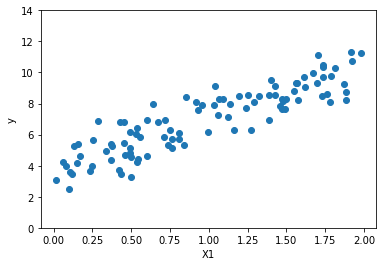

In [2]:
import matplotlib.pyplot as plt

def plt_scatter(X, y):
    plt.scatter(X, y)
    plt.xlabel("X1")
    plt.ylabel("y")
    plt.ylim(0, 14)

plt_scatter(X, y)
plt.show()

In [3]:
# 使用inv()函数来对矩阵求逆
X_b = np.c_[np.ones((100, 1)), X]   # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.76027189],
       [3.31380016]])

In [4]:
# 用theta_best预测
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.76027189],
       [10.38787221]])

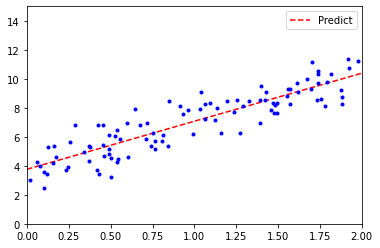

In [5]:
plt.plot(X_new, y_predict, "r--", label="Predict")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()


In [6]:
# 使用sklearn执行线性回归
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

# g(x) = w1x1 + w2x2 + w3x3 + w4x4 + w0
# coef_和intercept_都是模型参数，即为w
# coef_为w1到w4
# intercept_为w0

(array([3.76027189]), array([[3.31380016]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.76027189],
       [10.38787221]])

In [8]:
# LinearRegression类是基于linalg.lstsq()函数, 最小二乘
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)    # rcond--矩阵可逆的条件数估值
theta_best_svd                                                              # SVD:奇异值分解

array([[3.76027189],
       [3.31380016]])

## 4.1.2 计算复杂度
标准矩阵求逆的复杂度为$O(n{^{2.4}})$到$O(n{^{3}})$之间  
Scikit-Learn的LinearRegression类使用的SVD方法的复杂度约为$O(n{^{2}})$

# 4.2 梯度下降

## 4.2.1 批量梯度下降
成本函数的梯度向量
$$\nabla{_\theta}MSE(\theta)$$

梯度下降步骤
$$\theta^{(下一步)}=\theta-\eta\nabla{_\theta}MSE(\theta)$$

In [9]:
# 算法实现
eta = 0.1 # 学习率
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)   # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)             # 用整个训练集来计算每一步的梯度
    theta = theta - eta * gradients


In [10]:
theta

array([[3.76027189],
       [3.31380016]])

## 4.2.2 随机梯度下降

每一步在训练集中选择一个实例，并且仅基于单个实例来计算梯度  
可以帮助算法跳出局部最优  
逐步降低学习率，解决定位不出最小值  

In [11]:
n_epochs = 50
t0, t1 = 5, 50      # learning schedule hyperparameters

# 调整学习率
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [12]:
theta

array([[3.74735239],
       [3.32817385]])

In [13]:
# 使用带有Scikit-Learn的随机梯度下降执行线性回归

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) #最多运行1000个轮次,或者直到一个轮次期间损失下降<0.001为止
sgd_reg.fit(X, y.ravel())    #ravel()方法将数组维度拉成一维数组

SGDRegressor(eta0=0.1, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.68983643]), array([3.26613203]))

## 4.2.3 小批量梯度下降

在称为小型批量的随机实例上计算梯度  
优点：可以通过矩阵操作的硬件优化提高性能，特别在使用GPU时

#### 线性回归算法比较
|  算法   | m很大  | 核外支持  | n很大  | 超参数  | 要求参数  | Scikit-Learn  |
|  ----  | ----  | ----  | ----  | ----  | ----  | ----  |
| 标准方程  | 快 | 否 | 慢 | 0 | 否 | N/A |
| SVD  | 快 | 否 | 慢 | 0 | 否 | LinearRegression |
| 批量GD  | 慢 | 否 | 快 | 2 | 是 | SGDRegressor |
| 随机GD  | 快 | 是 | 快 | >=2 | 是 | SGDRegressor |
| 小批量GD  | 快 | 是 | 快 | >=2 | 是 | SGDRegressor |

# 4.3 多项式回归

In [15]:
# 生成一些非线性数据
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

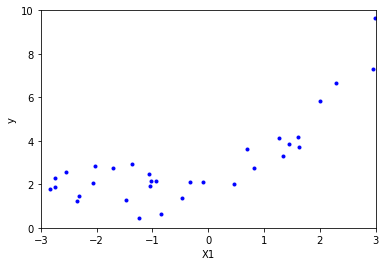

In [16]:
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.xlabel("X1")
plt.ylabel("y")
plt.show()


In [17]:
# 使用Scikit-Learn的PolynomaialFeatures类来转换训练数据
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-3.28149378])

In [18]:
X_poly[0]       # 包含原始特征以及该特征的平方

array([-3.28149378, 10.76820141])

[sklearn中fit_transform，transform和fit函数的区别和作用详解](https://wenku.baidu.com/view/e4119502a6e9856a561252d380eb6294dd882205.html)

In [19]:
# 将LinearRegression模型拟合到此扩展训练数据中
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.88288011]), array([[0.96458416, 0.50029624]]))

模型估算$\hat{y}=0.50079853x{_1^2}+1.01893322x{_1}+1.99493462$,原始函数为$\hat{y}=0.5x{_1^2}+1.0x{_1}+2.0+高斯噪声$  

高斯噪声(正态噪声)

degree = 3的PolynomialFeatures不仅会添加$a^2$、$a^3$、$b^2$、$b^3$,还会添加组合$ab$、$a^2b$和$ab^2$

# 4.4 消息曲线

模型在训练集和测试集上关于训练集大小(或训练迭代)的性能函数

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_leanring_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    # plt.axis([0, 80, 0.0, 3.0])
    plt.legend()
    plt.xlabel("Size of training set")
    plt.ylabel("RMSE")
    

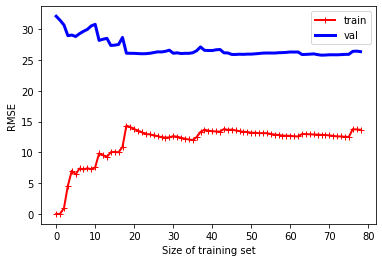

In [21]:
# 普通线性回归模型的学习曲线
lin_reg = LinearRegression()
plot_leanring_curves(lin_reg, X, y)

##### 欠拟合
当训练集只有一个或两个实例时，模型可以很好的拟合；  
之后误差会一直上升，直到达到平稳状态

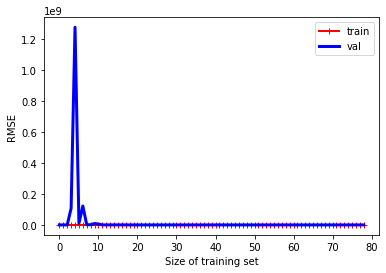

In [22]:
# 相同数据上的10阶多项式模型的学习曲线

from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
plot_leanring_curves(polynomial_regression, X, y)

* 与线性回归模型相比，训练数据上的误差要低得多
* 曲线之间存在间隙。这意味着该模型在训练数据上的性能要比在验证数据上的性能好的多，这是过拟合的标志。  
但是，如果使用更大的数据集，则两条曲线会继续接近。

# 4.5 正则化线性模型

减少过拟合

## 4.5.1 岭回归

岭回归成本函数
![Ridge Regression](https://img-blog.csdnimg.cn/20200524160500531.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L1NlcmVuZGlfcGF0dHk=,size_16,color_FFFFFF,t_70)

执行岭回归前要缩放数据

闭式解的岭回归
![Ridge Regression](https://img-blog.csdnimg.cn/20200524161236205.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L1NlcmVuZGlfcGF0dHk=,size_16,color_FFFFFF,t_70)

In [23]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.79118406]])

In [24]:
# 随机梯度下降法
sgd_reg = SGDRegressor(penalty="l2")    # "l2"表示希望SGD在成本函数中添加一个正则项，等于权重向量的l2范数的一半，即岭回归
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.15752258])

## 4.5.2 Lasso回归

Lasso回归成本函数  
![Lasso](https://img-blog.csdnimg.cn/20200524162222475.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L1NlcmVuZGlfcGF0dHk=,size_16,color_FFFFFF,t_70)

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.8060509])

In [26]:
# 也可以使用SGDRegressor(penalty="l1")

## 4.5.3 弹性网络

正则项是岭和Lasso正则项的简单混合  
弹性网络成本函数  
![弹性网络](https://img-blog.csdnimg.cn/20200524162938470.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L1NlcmVuZGlfcGF0dHk=,size_16,color_FFFFFF,t_70)

In [27]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.819421])

## 4.5.4 提前停止

一旦验证误差达到最小值就立刻停止训练  
一种解决方案：仅在验证错误超过最小值一段时间后停止，然后回滚模型参数到验证误差最小的位置

# 4.6 逻辑回归

## 4.6.1 估计概率

逻辑回归模型输出的是结果的数理逻辑值  
逻辑回归函数的估计概率(向量化形式)  
$$\hat{p}=h{_\theta}(x)=\sigma(x{^T}\theta)$$

逻辑记为$\sigma(\cdot)$，是一个sigmoid函数，输出一个介于0和1之间的数字  
逻辑函数$$\sigma(t)=\frac{1}{1+exp(-t)}$$

逻辑回归模型预测  
$$
\hat{y}=
\begin{cases}
0,\quad \hat{p}< 0.5 \\[2ex]
1, \quad \hat{p}\geq 0.5
\end{cases}
$$
如果$x^T\theta是正类$，逻辑回归模型的预测结果是1，如果是负类，则预测结果为0


## 4.6.2 训练和成本函数

训练的目的是设置参数向量$\theta$  
单个训练实例的成本函数
$$
c(\theta)=
\begin{cases}
-log(\hat{p}),\quad y=1 \\[2ex]
-log(1-\hat{p}), \quad y=0
\end{cases}
$$
当t接近于0，-log(t)会变得很大，所以如果模型估算一个正实例的概率接近于0，成本将会变得很高


逻辑回归成本函数(对数损失)  
![cost](https://www.zhihu.com/equation?tex=J%28w%29+%3D++-%5Cfrac%7B1%7D%7Bn%7D%28%5Csum_%7Bi%3D1%7D%5En%28y_ilnp%28x_i%29%2B%281-y_i%29ln%281-p%28x_i%29%29%29+%5C%5C)


通过梯度下降找到全局最小值  
逻辑成本函数偏导数  
![偏导数](https://www.zhihu.com/equation?tex=%5Cfrac+%7B+%5Cpartial+J+%28+%5Ctheta+%29+%7D+%7B+%5Cpartial+%5Ctheta_+j+%7D%3D%5Csum+_+%7B+i+%3D+1+%7D+%5E+%7B+m+%7D+%5Cfrac+%7B+1+%7D+%7B+m+%7D%28%5Cfrac+%7B+e%5E%7B%5Ctheta%5ET+x%5E%7B%28i%29%7D+%7D%7D+%7B+1+%2B+e+%5E+%7B+-+%5Ctheta+%5E+%7B+T+%7D+x+%7D+%7Dx%5E%7B%28i%29%7D_%7Bj%7D-y%5E%7B%28i%29%7Dx%5E%7B%28i%29%7D_%7Bj%7D%29%3D%5Csum+_+%7B+i+%3D+1+%7D+%5E+%7B+m+%7D%5Cfrac+%7B+1+%7D+%7B+m+%7D%28h_+%5Ctheta+%28+x+%5E+%7B+%28+i+%29+%7D+%29+-+y+%5E+%7B+%28+i+%29+%7D%29+x+_+%7B+j+%7D+%5E+%7B+%28+i+%29+%7D%2C%28j%3D0%2C1%2C2%2C...%2Cn%29%E2%80%8B)

## 4.6.3 决策边界

使用鸢尾花数据集  
仅基于花瓣宽度这一个特征，创建 一个分类器来检测维吉尼亚鸢尾花

In [28]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [30]:
X = iris["data"][:, 3:]     # petal width
y = (iris["target"] == 2).astype(np.int64)    # 1 if Iris virginica, else 0

In [31]:
# 训练一个逻辑回归模型
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [32]:
# 测试花瓣宽度在0到3cm之间的鸢尾花，模型估算出的概率
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)      # linspace创建等差数列, reshape(-1,1)表示（任意行，1列）
y_proba = log_reg.predict_proba(X_new)

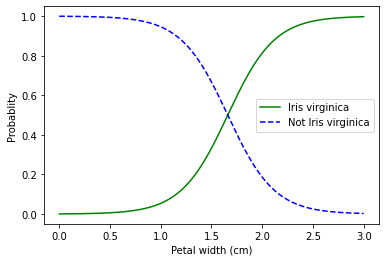

In [34]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()
plt.xlabel("Petal width (cm)")
plt.ylabel("Probablity")
plt.show()

In [35]:
# 预测类别
log_reg.predict([[1.7], [1.5]])

array([1, 0], dtype=int64)

## 4.6.4 Softmax回归

经过推广后的逻辑回归，可以直接支持多类别，或者叫做多元逻辑回归

使用Softmax回归将鸢尾花分为三类

In [36]:
X = iris["data"][:, (2, 3)]     # petal length, petal width
y = iris["target"]

In [37]:
# Scikit-Learn的LogisticRegression默认选择一对多的训练方式，可以将超参数multi_class设置为"multinomial"，将其切换为Softmax回归
# “lbfgs”求解器
# 超参数C使用l2正则化

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [38]:
# 判别花瓣长5cm宽2cm
softmax_reg.predict([[5, 2]])

array([2])

In [39]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])